In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [21]:
df=pd.read_csv("loan_approval_data.csv")
df.drop(columns="ApplicantID",inplace=True)
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,3+,Graduate,Yes,11435,3655,699,180,1,Urban,0
1,Female,No,2,Not Graduate,Yes,6998,7938,164,300,1,Urban,1
2,Male,Yes,1,Graduate,No,2162,9101,283,240,1,Rural,0
3,Male,Yes,0,Graduate,Yes,3974,187,589,180,1,Urban,0
4,Male,No,3+,Graduate,Yes,21675,5409,60,360,0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Male,No,3+,Not Graduate,No,10605,4733,220,300,1,Urban,1
796,Male,No,3+,Not Graduate,No,4014,7081,208,120,0,Semiurban,0
797,Male,Yes,2,Graduate,No,3381,8690,250,360,1,Rural,1
798,Male,No,2,Graduate,No,3098,7117,536,120,1,Rural,0


In [22]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,3,0,1,11435,3655,699,180,1,2,0
1,0,0,2,1,1,6998,7938,164,300,1,2,1
2,1,1,1,0,0,2162,9101,283,240,1,0,0
3,1,1,0,0,1,3974,187,589,180,1,2,0
4,1,0,3,0,1,21675,5409,60,360,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,0,3,1,0,10605,4733,220,300,1,2,1
796,1,0,3,1,0,4014,7081,208,120,0,1,0
797,1,1,2,0,0,3381,8690,250,360,1,0,1
798,1,0,2,0,0,3098,7117,536,120,1,0,0


In [23]:
X=df[["LoanAmount","Loan_Amount_Term"]]
y=df["Loan_Status"]

In [24]:
scalar=StandardScaler()
scu=scalar.fit_transform(X)
scu

array([[ 1.80423183, -0.77369841],
       [-1.13854537,  0.67246684],
       [-0.48398371, -0.05061578],
       ...,
       [-0.66550081,  1.39554946],
       [ 0.90764737, -1.49678103],
       [ 1.29268364,  0.67246684]], shape=(800, 2))

In [25]:
x_train,x_test,y_train,y_test=train_test_split(scu,y,test_size=0.2,random_state=42)

accuracy score of linear:73.75%


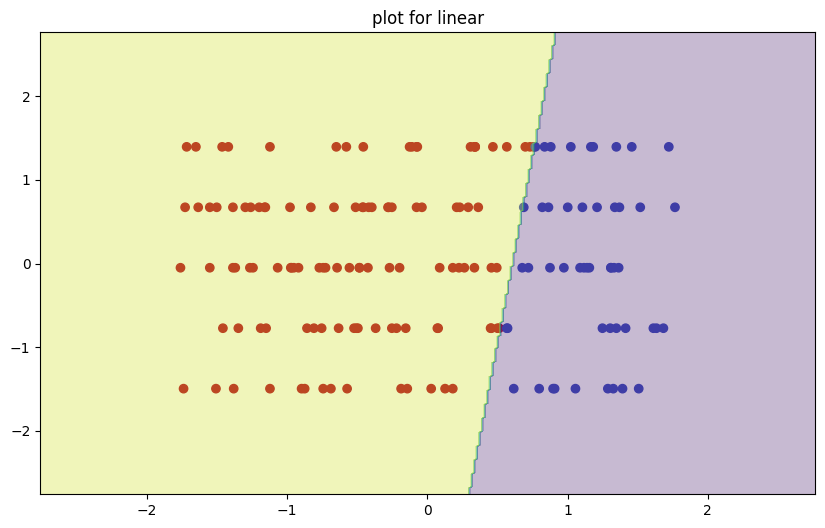

accuracy score of poly:71.88%


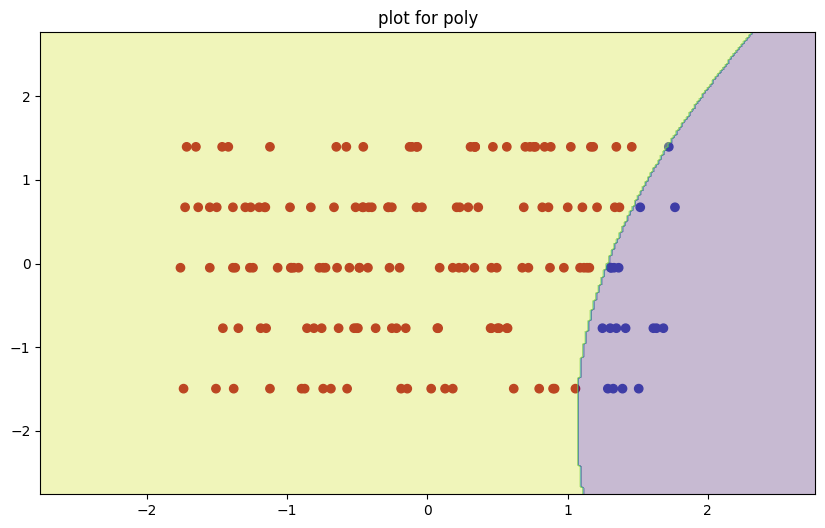

accuracy score of rbf:74.38%


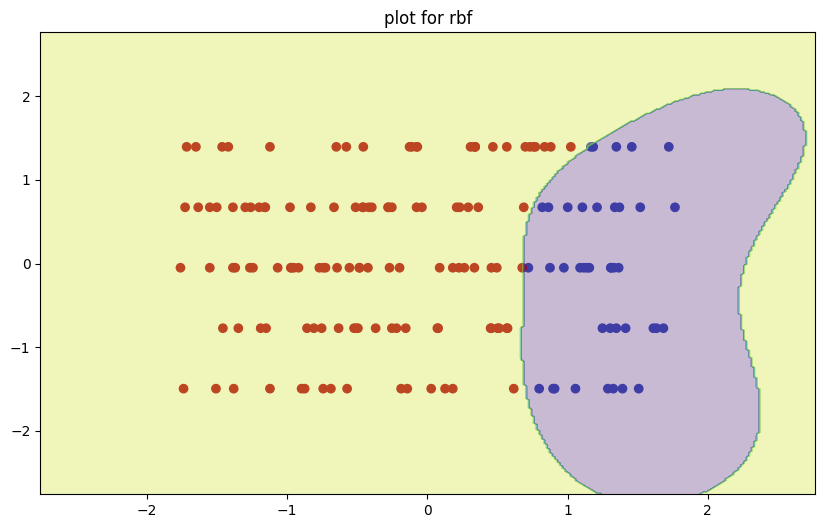

accuracy score of sigmoid:61.88%


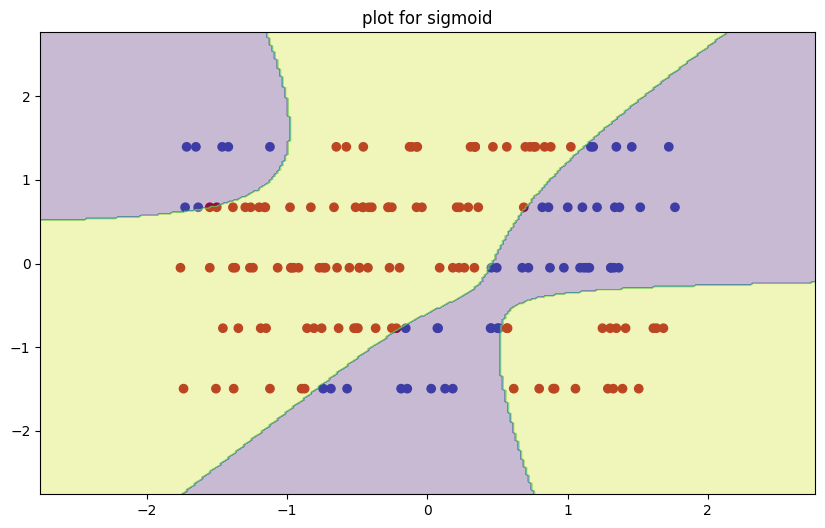

In [26]:
kernal=["linear","poly","rbf","sigmoid"]
for i in kernal:
    svm=SVC(kernel=i,degree=3,gamma="auto")
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    y_pred
    acc=accuracy_score(y_test,y_pred)
    print(f"accuracy score of {i}:{acc*100:.2f}%")

    plt.figure(figsize=[10,6])
    plt.scatter(x_test[:, 0],x_test[:, 1],c=y_pred,cmap="coolwarm")
    x_min,x_max=x_test[:, 0].min()-1 ,x_test[:, 0].max()+1
    y_min,y_max=x_test[:, 1].min()-1 ,x_test[:, 1].max()+1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,300),np.linspace(x_min,x_max,300))
    z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
    plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3)
    plt.title(f"plot for {i}")
    plt.show()


In [27]:
new=np.array([[32.980285,19912.928365]])
scu=scalar.transform(new)
a=svm.predict(scu)
a

c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])